In [1]:
def dy_dx(x):
    return 2 * x

In [2]:
dy_dx(2)

4

## AutoGrad 
- For Backpropogation -> chain rule of derivate

In [3]:
import torch

In [4]:
x = torch.tensor(3.0,requires_grad=True)
x

tensor(3., requires_grad=True)

In [5]:
y = x ** 2
y

tensor(9., grad_fn=<PowBackward0>)

In [6]:
y.backward() ## backward propogration for the gradient

In [7]:
x.grad

tensor(6.)

In [8]:
import math 
def dz_dx(x):
    return 2 * x + math.sin(x)

In [9]:
dz_dx(2)

4.909297426825682

In [10]:
y = x**2
z = torch.sin(y)

In [11]:
z.backward()

In [12]:
x.grad

tensor(0.5332)

## Neural Network
https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

- Neural networks (NNs) are a collection of nested functions that are executed on some input data. These functions are defined by parameters (consisting of weights and biases), which in PyTorch are stored in tensors.

- Training a NN happens in two steps:
    - Forward Propagation: In forward prop, the NN makes its best guess about the correct output. It runs the input data through each of its functions to make this guess.
    - Backward Propagation: In backprop, the NN adjusts its parameters proportionate to the error in its guess. It does this by traversing backwards from the output, collecting the derivatives of the error with respect to the parameters of the functions (gradients), and optimizing the parameters using gradient descent. For a more detailed walkthrough of backprop

In [13]:
import torch.nn as nn

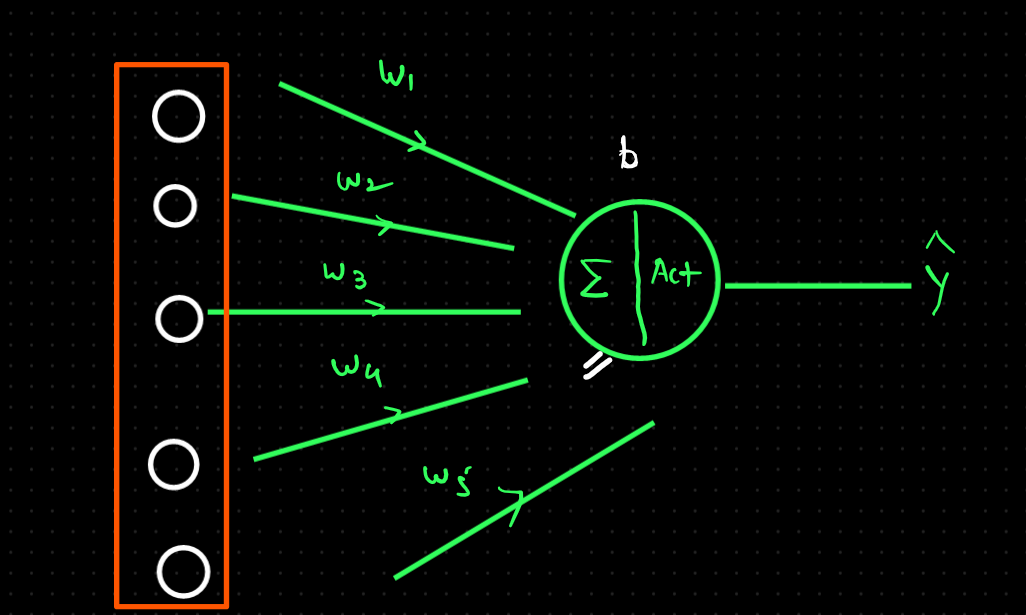

In [14]:
class Model(nn.Module):
    def __init__(self, new_feature):
        super().__init__()
        self.linear = nn.Linear(new_feature, 1) # Hidden layer with single neuron
        self.sigmoid = nn.Sigmoid()

    def forward(self, features):
        output = self.linear(features)
        output = self.sigmoid(output)
        return output
        

In [15]:
features = torch.rand(10, 5) # 10 rows, 5 columns random values
features

tensor([[0.7603, 0.1877, 0.4974, 0.8385, 0.9368],
        [0.0018, 0.2519, 0.9825, 0.5849, 0.6767],
        [0.1810, 0.1402, 0.2233, 0.3219, 0.3105],
        [0.0630, 0.3472, 0.1907, 0.2631, 0.8426],
        [0.0193, 0.9876, 0.1361, 0.1052, 0.0465],
        [0.8923, 0.3226, 0.9464, 0.4409, 0.8800],
        [0.3679, 0.6595, 0.6770, 0.0617, 0.0362],
        [0.9843, 0.0651, 0.4376, 0.6197, 0.3556],
        [0.6739, 0.3512, 0.3347, 0.8672, 0.2993],
        [0.7496, 0.8924, 0.6060, 0.1622, 0.7628]])

In [16]:
features.shape

torch.Size([10, 5])

In [17]:
features.shape[1]  # 5 - features

5

In [18]:
model = Model(features.shape[1])
model(features)

tensor([[0.6250],
        [0.6013],
        [0.5916],
        [0.5983],
        [0.4837],
        [0.5440],
        [0.4699],
        [0.5791],
        [0.5931],
        [0.4745]], grad_fn=<SigmoidBackward0>)

In [19]:
model.forward(features)

tensor([[0.6250],
        [0.6013],
        [0.5916],
        [0.5983],
        [0.4837],
        [0.5440],
        [0.4699],
        [0.5791],
        [0.5931],
        [0.4745]], grad_fn=<SigmoidBackward0>)

#### Understanding the __call__ function

In [20]:
class Test:
    def __init__(self):
        print("hello from init")
    def __call__(self):
        print("hello from call")
    def testing(self):
        print("Hello from testing")

In [21]:
obj = Test()

hello from init


In [22]:
obj.testing()

Hello from testing


In [23]:
obj() ## calling object as a function

hello from call


## Complex Neural Network Model

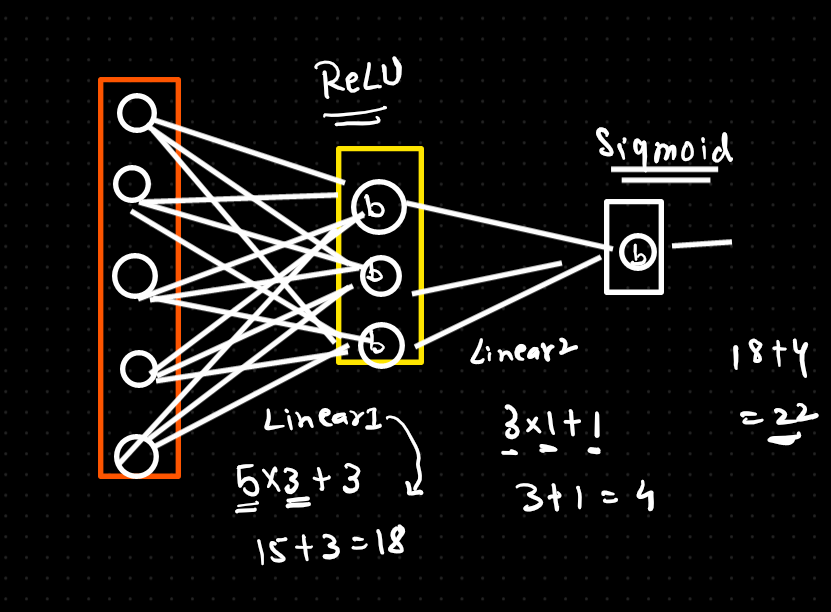

In [24]:
class Model(nn.Module):
    def __init__(self, new_feature):
        super().__init__()
        self.linear1 = nn.Linear(new_feature, 3) # Hidden layer with 3 neuron
        self.relu = nn.ReLU() ## To apply Relu on Hidden layer
        self.linear2 = nn.Linear(3, 1) # Ouput layer
        self.sigmoid = nn.Sigmoid() # To apply Sigmoid on output layer

    def forward(self, features):
        output = self.linear1(features)
        output = self.relu(output)
        output = self.linear2(output)
        output = self.sigmoid(output)
        return output

In [25]:
data = torch.rand(10,5) # 10 rows, 5 - columns / features
data

tensor([[0.6916, 0.0720, 0.1249, 0.2499, 0.0881],
        [0.7911, 0.1684, 0.2278, 0.0612, 0.7720],
        [0.5961, 0.1867, 0.7377, 0.7505, 0.1588],
        [0.8818, 0.8369, 0.2024, 0.5360, 0.6861],
        [0.5683, 0.4013, 0.1572, 0.2548, 0.5336],
        [0.2247, 0.4184, 0.8236, 0.2006, 0.8434],
        [0.7565, 0.3698, 0.0795, 0.0130, 0.2654],
        [0.1796, 0.0445, 0.6669, 0.7757, 0.7386],
        [0.9155, 0.3483, 0.4964, 0.0295, 0.0506],
        [0.1010, 0.4414, 0.5093, 0.1631, 0.6734]])

In [26]:
data.shape[1]

5

In [27]:
model = Model(data.shape[1])
model

Model(
  (linear1): Linear(in_features=5, out_features=3, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [28]:
model(data)

tensor([[0.5660],
        [0.5327],
        [0.5684],
        [0.6043],
        [0.5744],
        [0.5581],
        [0.5704],
        [0.5764],
        [0.5674],
        [0.5757]], grad_fn=<SigmoidBackward0>)

In [29]:
model.linear1.weight ## 15 trainable parameter into Hiddenlayer

Parameter containing:
tensor([[ 0.0124,  0.3342, -0.0422, -0.0966, -0.1122],
        [-0.0377,  0.1394, -0.1990,  0.2785, -0.2992],
        [-0.2909,  0.0455, -0.0716,  0.2854,  0.3442]], requires_grad=True)

In [30]:
model.linear1.bias  ## 3 trainable parameter into Hiddenlayer

Parameter containing:
tensor([ 0.3436,  0.3040, -0.0049], requires_grad=True)

In [31]:
model.linear2.weight ## 3 trainable parameter into output 

Parameter containing:
tensor([[0.5261, 0.5247, 0.5412]], requires_grad=True)

In [32]:
model.linear2.bias ## 1 trainable parameter into output 

Parameter containing:
tensor([-0.0725], requires_grad=True)

In [45]:
## Creating the above model with Sequential Model -> This is much easy to create Neural Network
class Model2(nn.Module):
    def __init__(self, new_feature):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(new_feature, 3),
            nn.ReLU(),
            nn.Linear(3,1),
            nn.Sigmoid()
        )

    def forward(self, features):
        output = self.network(features)
        return output

In [40]:
model = Model2(data.shape[1])
model

Model2(
  (network): Sequential(
    (0): Linear(in_features=5, out_features=3, bias=True)
    (1): ReLU()
    (2): Linear(in_features=3, out_features=1, bias=True)
    (3): Sigmoid()
  )
)

In [41]:
model(data)

tensor([[0.3719],
        [0.3817],
        [0.4211],
        [0.4173],
        [0.3823],
        [0.4068],
        [0.3751],
        [0.4191],
        [0.3942],
        [0.3861]], grad_fn=<SigmoidBackward0>)

In [46]:
from torchinfo import summary
summary(model) ## Summary of the model

Layer (type:depth-idx)                   Param #
Model2                                   --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                       18
│    └─ReLU: 2-2                         --
│    └─Linear: 2-3                       4
│    └─Sigmoid: 2-4                      --
Total params: 22
Trainable params: 22
Non-trainable params: 0

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [50]:
df.shape

(569, 33)

In [51]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [52]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [55]:
df.drop(columns=['id', 'Unnamed: 32'], axis=1, inplace=True)

In [57]:
df.shape

(569, 31)